In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
def cv2_imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix

### loading the MNIST data from keras



In [16]:
(X_train , Y_train),(X_test, Y_test) = mnist.load_data()

type(X_train)

numpy.ndarray

### shape of numpy array


In [17]:
print(X_train.shape , Y_train.shape ,X_test.shape , Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Training data : 60,000 images ,
### Test data : 10,000 images




### Image Label

In [18]:
print(Y_train.shape , Y_test.shape)

# Unique Value
print(np.unique(Y_train))

(60000,) (10000,)
[0 1 2 3 4 5 6 7 8 9]


### We can use labels as suchor we can also apply One Shot Encoding

### All the images have the same dimenstions in the dataset, if not, we have to realize all the images to a commondimention


In [19]:
# scaling the value
X_train = X_train/255
X_test = X_test/255

# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building Neural Network

In [20]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


C:\Users\Aviral Goyal\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the neural network


In [21]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Training the Neural network

In [22]:
model.fit(X_train, Y_train ,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9134 - loss: 0.3007
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9592 - loss: 0.1373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9696 - loss: 0.1010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0653
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9838 - loss: 0.0541
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0454
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0340
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0303


### Training data Accuracy : 98.9%

In [23]:
# test data
loss , accuracy = model.evaluate(X_test , Y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9703 - loss: 0.1183


### test data accuracy : 96.8%

(10000, 28, 28)


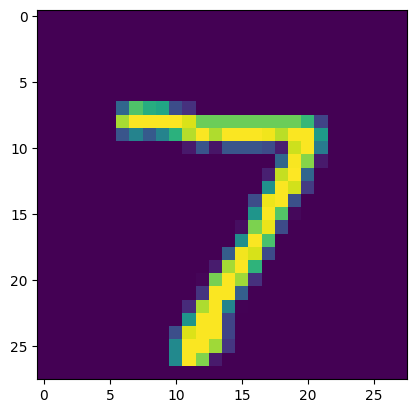

7
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[9.2058809e-04 2.3537714e-03 3.3764143e-02 8.0687129e-01 2.2178986e-08
 5.6359876e-02 5.2030272e-11 9.9999857e-01 7.1193062e-04 2.4407814e-01]


In [24]:
print(X_test.shape)

# First data point in X_test
plt.imshow(X_test[0])
plt.show()

print(Y_test[0])

Y_pred = model.predict(X_test)

print(Y_pred.shape)

print(Y_pred[0])

### model.predict() gives the prediction probability of each class

7
[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(

Text(0.5, 47.7222222222222, 'Predicted Label')

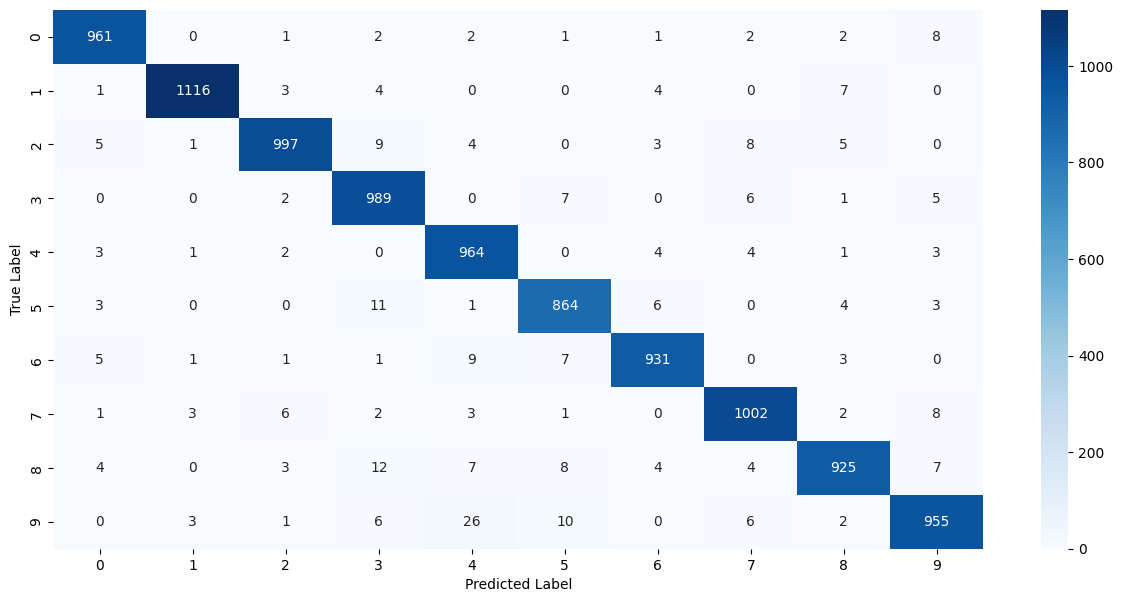

In [25]:
# converting prediction probability to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

# converting the prediction probability to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

# confusin matrix

conf_mat = confusion_matrix(Y_test, Y_pred_labels)

print(conf_mat)

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat , annot=True , fmt = 'd', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


### Building a predictive system

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[5.2515784e-06 1.4121212e-03 4.0066324e-04 1.0000000e+00 1.1118300e-10
  2.2238030e-04 2.7915796e-15 4.3408545e-06 5.3578869e-02 9.9870974e-01]]
3


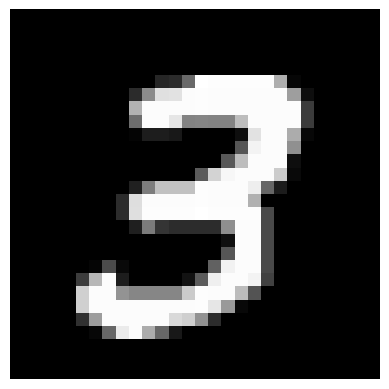

In [ ]:
#input_image_path = "D:\ML Project1\MNIST Digit Classification with Neural Network\MNIST_digit.png"

input_image = cv2.imread(input_image_path)

type(input_image)

cv2_imshow(input_image)

input_image.shape

# We have to convert this image into grey scale image and after that we have to reshape this image
grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

grayscale.shape    #converted into gray scale image thats y no 3

# resizing
input_image_resize = cv2.resize(grayscale , (28,28))

input_image_resize.shape

cv2_imshow(input_image_resize)

input_image_resize = input_image_resize/255

# reshape
image_reshape = np.reshape(input_image_resize , [1,28,28])

input_pred = model.predict(image_reshape)
print(input_pred)

input_pred_label = np.argmax(input_pred)

print(input_pred_label)

"""**Predictive system**"""

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The handwriten Digit is recognized as : 2


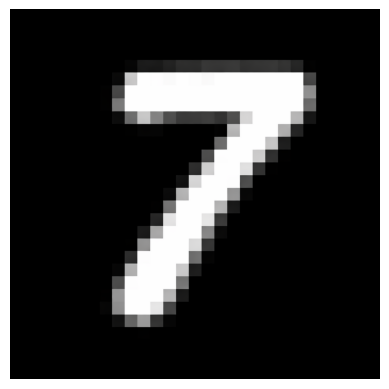

In [ ]:
input_image_path = input("Enter path of image: ")

input_image = cv2.imread(input_image_path)

if input_image is None:
    print("❌ Error: Image not found. Check the path.")
else:
    cv2_imshow(input_image)


cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale , (28,28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize , [1,28,28])

input_pred = model.predict(image_reshape)

input_pred_label = np.argmax(input_pred)

input_pred_label = np.argmax(input_pred)

print("The handwriten Digit is recognized as :",input_pred_label)